# Mão na massa - Aula 1

In [1]:
url = '/content/drive/MyDrive/Alura/Cursos/3773 - TensorFlow Keras: Classificando imagens com redes convolucionais/Projeto/catarata'

In [2]:
import pathlib

In [3]:
data_dir=pathlib.Path(url)

In [4]:
import tensorflow as tf

In [5]:
batch_size = 64
altura = 416
largura = 416

In [6]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=171,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 410 files belonging to 2 classes.
Using 328 files for training.


In [7]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=171,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 410 files belonging to 2 classes.
Using 82 files for validation.


In [8]:
treino.class_names

['immature', 'mature']

# Mão na massa - Aula 2

In [9]:
tf.random.set_seed(245)

In [10]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  #
])


In [11]:
# Compilando o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # Use 'binary_crossentropy' porque o problema é binário
              metrics=['accuracy'])

In [12]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
6/6 [==============================] - 6s 236ms/step - loss: 108.1400 - accuracy: 0.4970 - val_loss: 49.8241 - val_accuracy: 0.5854
Epoch 2/10
6/6 [==============================] - 2s 167ms/step - loss: 25.8222 - accuracy: 0.6829 - val_loss: 17.8088 - val_accuracy: 0.7683
Epoch 3/10
6/6 [==============================] - 2s 175ms/step - loss: 19.7340 - accuracy: 0.7866 - val_loss: 15.6739 - val_accuracy: 0.8659
Epoch 4/10
6/6 [==============================] - 2s 165ms/step - loss: 12.8541 - accuracy: 0.8323 - val_loss: 38.7016 - val_accuracy: 0.7439
Epoch 5/10
6/6 [==============================] - 3s 357ms/step - loss: 12.0210 - accuracy: 0.8598 - val_loss: 11.6005 - val_accuracy: 0.8171
Epoch 6/10
6/6 [==============================] - 2s 207ms/step - loss: 7.0253 - accuracy: 0.8933 - val_loss: 9.9912 - val_accuracy: 0.8171
Epoch 7/10
6/6 [==============================] - 2s 213ms/step - loss: 4.1398 - accuracy: 0.9390 - val_loss: 16.1455 - val_accuracy: 0.8659
Epoch 8/

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

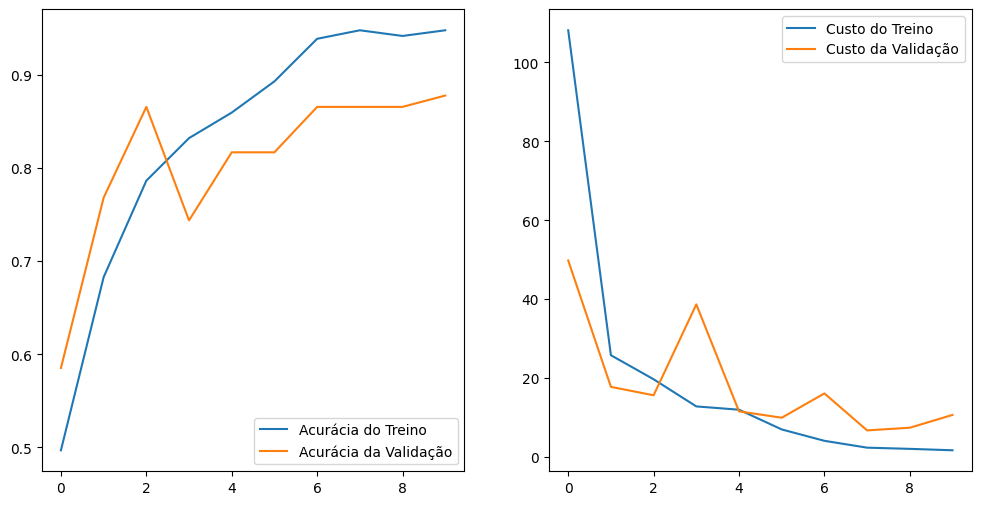

In [15]:
plota_resultados(history,epocas)

In [16]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [17]:
# Compilando o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # Use 'binary_crossentropy' porque o problema é binário
              metrics=['accuracy'])

In [18]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
6/6 [==============================] - 13s 778ms/step - loss: 13.8969 - accuracy: 0.5000 - val_loss: 5.1362 - val_accuracy: 0.5366
Epoch 2/10
6/6 [==============================] - 3s 286ms/step - loss: 2.2229 - accuracy: 0.5366 - val_loss: 0.8227 - val_accuracy: 0.5122
Epoch 3/10
6/6 [==============================] - 3s 285ms/step - loss: 0.5612 - accuracy: 0.7134 - val_loss: 0.5596 - val_accuracy: 0.7073
Epoch 4/10
6/6 [==============================] - 3s 375ms/step - loss: 0.3489 - accuracy: 0.8628 - val_loss: 0.3706 - val_accuracy: 0.8902
Epoch 5/10
6/6 [==============================] - 3s 292ms/step - loss: 0.2421 - accuracy: 0.9024 - val_loss: 0.3776 - val_accuracy: 0.8171
Epoch 6/10
6/6 [==============================] - 3s 294ms/step - loss: 0.1303 - accuracy: 0.9634 - val_loss: 0.3063 - val_accuracy: 0.8537
Epoch 7/10
6/6 [==============================] - 3s 290ms/step - loss: 0.0601 - accuracy: 0.9939 - val_loss: 0.3407 - val_accuracy: 0.8902
Epoch 8/10
6/6 [==

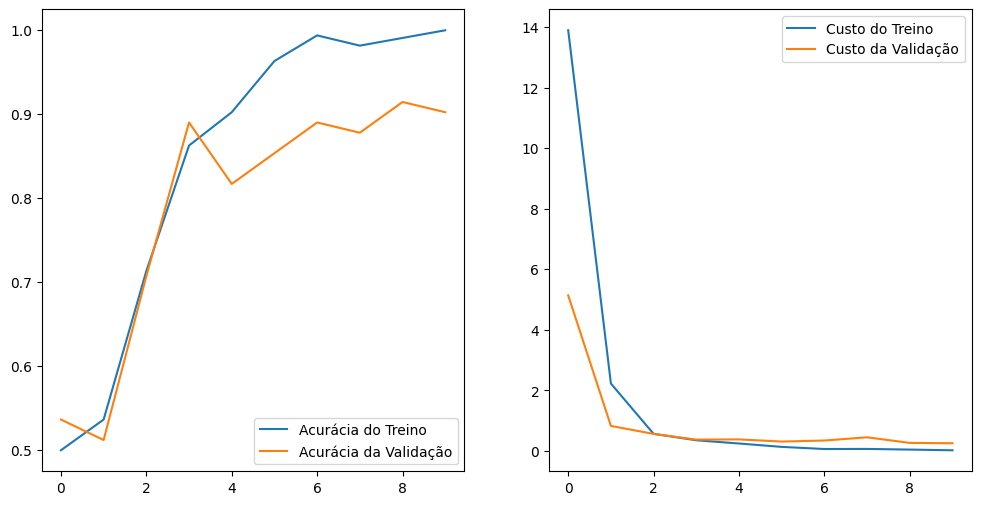

In [19]:
plota_resultados(history,epocas)